In [31]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [32]:

# loading the dataset to a pandas dataframe
df = pd.read_csv("movies.csv")

In [33]:


df.shape

(10000, 9)

In [34]:
df.shape

(10000, 9)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  int64  
 1   title              10000 non-null  object 
 2   genres             9997 non-null   object 
 3   original_language  10000 non-null  object 
 4   overview           9987 non-null   object 
 5   popularity         10000 non-null  float64
 6   release_date       10000 non-null  object 
 7   vote_average       10000 non-null  float64
 8   vote_count         10000 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 703.2+ KB


In [36]:
df.columns

Index(['id', 'title', 'genres', 'original_language', 'overview', 'popularity',
       'release_date', 'vote_average', 'vote_count'],
      dtype='object')

In [37]:
#filter the required columns
required_columns=['title','overview','genres']
df = df[required_columns] 

In [38]:
df=df.dropna().reset_index(drop=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9985 entries, 0 to 9984
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     9985 non-null   object
 1   overview  9985 non-null   object
 2   genres    9985 non-null   object
dtypes: object(3)
memory usage: 234.1+ KB


In [40]:
df['combined'] =  df['genres'] + ' ' + df['overview'] 

In [41]:
df.head()

,title,overview,genres,combined
0,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,"Drama,Crime","Drama,Crime Framed in the 1940s for the double..."
1,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...","Comedy,Drama,Romance","Comedy,Drama,Romance Raj is a rich, carefree, ..."
2,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...","Drama,Crime","Drama,Crime Spanning the years 1945 to 1955, a..."
3,Schindler's List,The true story of how businessman Oskar Schind...,"Drama,History,War","Drama,History,War The true story of how busine..."
4,The Godfather: Part II,In the continuing saga of the Corleone crime f...,"Drama,Crime","Drama,Crime In the continuing saga of the Corl..."


In [42]:
data=df[['title','combined']]

In [43]:
data.head(2)

,title,combined
0,The Shawshank Redemption,"Drama,Crime Framed in the 1940s for the double..."
1,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance Raj is a rich, carefree, ..."


In [44]:
data.shape

(9985, 2)

In [45]:
combined_text = " ".join(df['combined'])


In [46]:
WordCloud=WordCloud(width=800, height=400, background_color='white').generate(combined_text)

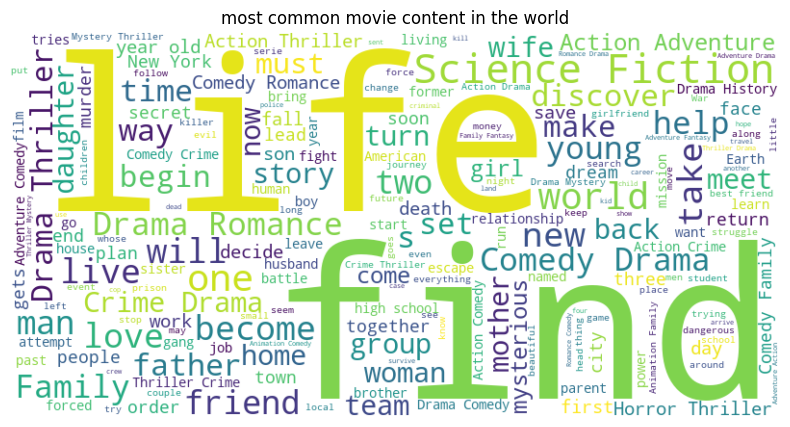

In [47]:
#visualizetion
plt.figure(figsize=(10,5))
plt.imshow(WordCloud, interpolation='bilinear')
plt.axis('off')
plt.title('most common movie content in the world')
plt.show()

In [48]:

# download nltk data
import nltk

nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to C:\Users\BISWAJIT
[nltk_data]     SARDAR\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\BISWAJIT
[nltk_data]     SARDAR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [49]:
stop_words = set(stopwords.words('english'))

In [50]:
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize and remove stopwords
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

In [51]:
# Apply preprocessing to the movie content
data['cleaned_text'] = df['combined'].apply(preprocess_text)

C:\Users\BISWAJIT SARDAR\AppData\Local\Temp\ipykernel_23356\802455668.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleaned_text'] = df['combined'].apply(preprocess_text)


In [52]:
data.head(2)

,title,combined,cleaned_text
0,The Shawshank Redemption,"Drama,Crime Framed in the 1940s for the double...",dramacrime framed double murder wife lover ups...
1,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance Raj is a rich, carefree, ...",comedydramaromance raj rich carefree happygolu...


In [53]:
# Vectorization with TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(data['cleaned_text'])

In [54]:
# Compute Cosine Similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [55]:
print(cosine_sim[0])

[1.         0.01817118 0.05085207 ... 0.06986897 0.05308892 0.02572826]


In [56]:
# Recommendation Function
def recommend_movies(movie_name, cosine_sim=cosine_sim, df=data, top_n=5):
    # Find the index of the movie
    idx = df[df['title'].str.lower() == movie_name.lower()].index
    if len(idx) == 0:
        return "Movie not found in the dataset!"
    idx = idx[0]

    # Get similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]

    # Get movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return top n similar movies
    return df[['title']].iloc[movie_indices]

In [57]:
data["title"]

0                            The Shawshank Redemption
1                         Dilwale Dulhania Le Jayenge
2                                       The Godfather
3                                    Schindler's List
4                              The Godfather: Part II
                            ...                      
9980                               The Last Airbender
9981                         Sharknado 3: Oh Hell No!
9982                                  Captain America
9983    In the Name of the King: A Dungeon Siege Tale
9984                                           Domino
Name: title, Length: 9985, dtype: object

In [58]:
# row_index = df[df['title'] == "Avengers: Age of Ultron"].index
row_index = df[df['title'] == "Batman v Superman: Dawn of Justice"].index
print(row_index)

Index([8062], dtype='int64')


In [59]:
movie_name = data["title"][10]
print(movie_name)

12 Angry Men


In [60]:
# Example Recommendation

print(f"Recommendations for the Movie {movie_name}")
recommendations = recommend_movies(movie_name)
print(recommendations)

Recommendations for the Movie 12 Angry Men
                 title
797       12 Angry Men
3245        Conviction
1338  The Long Goodbye
5640   The Whole Truth
8356  Reasonable Doubt
